# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [1]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [2]:
#Sigmoid Function
def sigmoid(x):
    result = np.divide(1, (1 + np.exp(-x)))
    return result

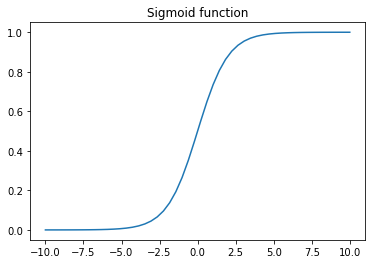

In [3]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x = np.linspace(-10, 10, 50)
#Find y_val, by using sigmoid function
y = sigmoid(x)
#Plot x_val,y_val and label the graph
plt.plot(x, y)
plt.title('Sigmoid function')
plt.show()

Minimum log loss for label 0:
9.992007221626415e-16

Minimum log loss for label 1:
9.992007221626415e-16



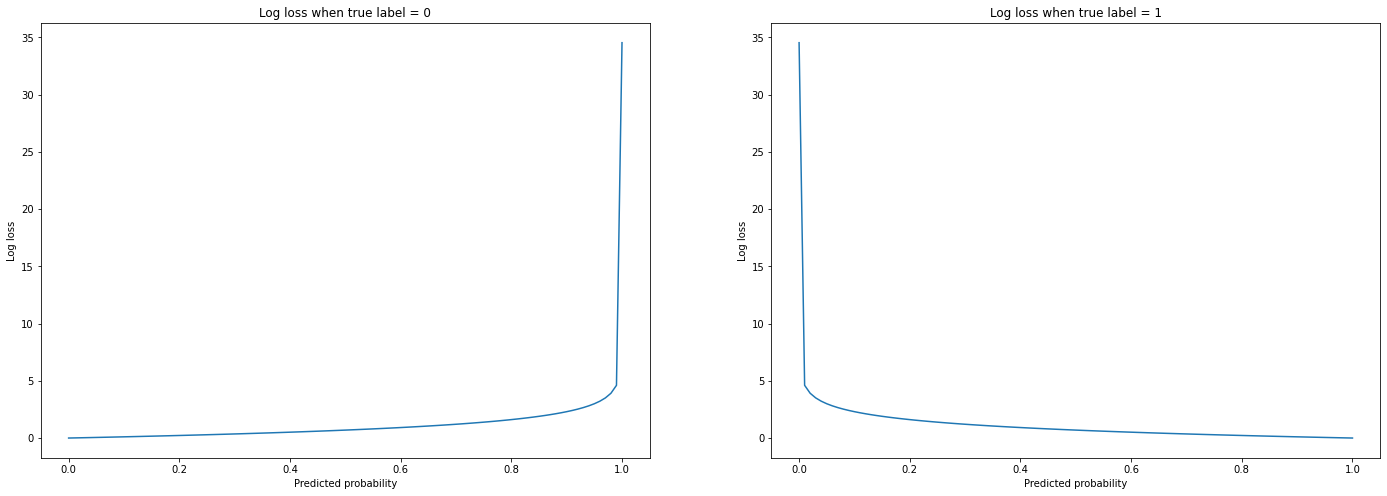

In [4]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
predictions = [i * 0.01 for i in range(0,101)]
# evaluate predictions for a 0 true value
log_loss_0 = [log_loss([1],[[i*0.01,1-(i*0.01)]],eps=1e-15, labels=[1,0]) for i in range(0,101,1)]
#print(y)
print("Minimum log loss for label 0:")
print(min(log_loss_0))
print()

# evaluate predictions for a 1 true value
log_loss_1 = [log_loss([0],[[i*0.01,1-(i*0.01)]],eps=1e-15, labels=[1,0]) for i in range(0,101,1)]
#print(y)
print("Minimum log loss for label 1:")
print(min(log_loss_1))
print()

# plot input to loss

fig, ax = plt.subplots(1,2, figsize = (24,8))

ax[0].plot(predictions, log_loss_0)
ax[0].set_title("Log loss when true label = 0")
ax[0].set_xlabel("Predicted probability")
ax[0].set_ylabel("Log loss")

ax[1].plot(predictions, log_loss_1)
ax[1].set_title("Log loss when true label = 1")
ax[1].set_xlabel("Predicted probability")
ax[1].set_ylabel("Log loss")

plt.show()

In [5]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0]= abs(min(log_loss_0) - min(log_loss_1))
ans[0]

0.0

# ***`Processing the Data`***

In [6]:
#Import the dataset of iris from datasets.load_iris()
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns = data.feature_names)
iris["Species"] = data.target

In [7]:
#Look into the top 5 rows of data
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


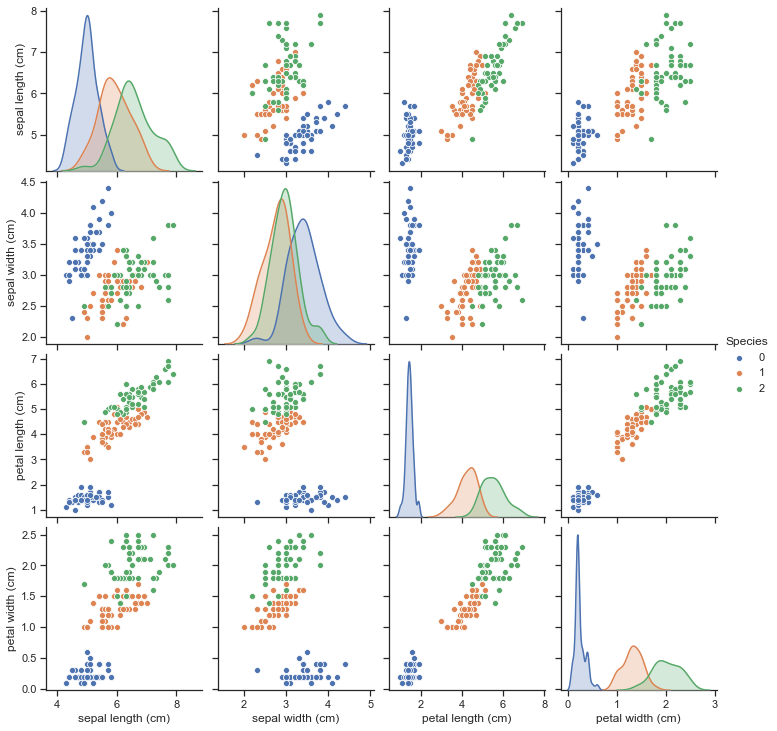

In [8]:
#Visualize  the data using seaborn pairplot
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, hue = "Species")

In [9]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# Create new array of numerical labels
Species_encoded = labelencoder.fit_transform(iris['Species'])

In [10]:
# Drop old labels(char) data 
iris.drop("Species", axis = 1, inplace = True)
# Substitute new labels(numerical) into data
iris["Species_encoded"] = Species_encoded

In [11]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
iris_new = iris[iris["Species_encoded"] < 2]
iris_new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [12]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
setosa = iris[iris["Species_encoded"] == 0]
setosa_mean = setosa["sepal length (cm)"].mean()
versicolor = iris[iris["Species_encoded"] == 1]
versicolor_mean = versicolor["sepal length (cm)"].mean()
ans[1]= abs(setosa_mean - versicolor_mean)
ans[1]

0.9300000000000006

# ***`Obtaining Weight Values`***

In [13]:
# Split the data into X and y
X =iris_new.loc[:,['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_new.loc[:, ['Species_encoded']]

In [14]:
# Visualize X,y
print("X")
X.head()

X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
print("y")
y.head()

y


,Species_encoded
0,0
1,0
2,0
3,0
4,0


In [16]:
# Convert X,y into arrays
X_arr = X.to_numpy()
y_arr = y.to_numpy()
pass

In [17]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.2, random_state = 42)

In [18]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.metrics import accuracy_score

#Building our model
def gradients(X_train, y_train, y_hat):
    
    # m-> number of training examples.
    m = X_train.shape[0]
    
    # Gradient of loss w.r.t weights.
    d_weights = (1/m)*np.dot(X_train.T, (y_hat - y_train))
    
    # Gradient of loss w.r.t bias.
    d_bias = (1/m)*np.sum((y_hat - y_train)) 
    
    return d_weights, d_bias

def normalize(X_train):
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X_train.shape
    
    # Normalization of all the n features of X_train.
    for i in range(n):
        X_train = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
        
    return X_train

#Finding the parameter and bias

# Loss function that returns the mean log loss over all training examples
def loss(y_train, y_hat):
    return np.mean(log_loss(y_train, y_hat))

def train(X_train, y_train, batch_size, epochs, lr):
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X_train.shape
    
    #w -> weights
    #b -> bias 
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y_train = y_train.reshape(m,1)
    
    # Normalizing the inputs.
    x_train = normalize(X_train)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//batch_size + 1):
            
            # Batch Gradient Descent Algorithm
            start_i = i*batch_size
            end_i = start_i + batch_size
            x_train_b = X_train[start_i:end_i]
            y_train_b = y_train[start_i:end_i]
            
            # Calculating predicted probabilities
            y_hat = sigmoid(np.dot(x_train_b, w) + b)
            
            # Getting the gradients of loss w.r.t weights and bias.
            dw, db = gradients(x_train_b, y_train_b, y_hat)
            
            # Updating the parameters (weights and bias).
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss 
        l = loss(y_train, sigmoid(np.dot(X_train, w) + b))
        losses.append(l)
        
    return w, b, losses


In [19]:
#Printing the parameters and bias
w, b, loss = train(X_train, y_train, X_train.shape[0], 1000, 0.01)
print("Weights:")
print(w)
print()
print("Bias:")
print(b)

Weights:
[[-0.26714544]
 [-1.04405513]
 [ 1.60340246]
 [ 0.69001528]]

Bias:
-0.18607950418092598


In [20]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
w_final = w.reshape(1, 4)[0]
ans[2] = np.append(w_final, b)
print("Overall parameters vector:")
print(ans[2])

Overall parameters vector:
[-0.26714544 -1.04405513  1.60340246  0.69001528 -0.1860795 ]


In [21]:
#Predicitng on our test data
def predict(X_test):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x_test = normalize(X_test)
    
    # Calculating presictions/y_hat.
    predictions = sigmoid(np.dot(X_test, w) + b)
    
    # Empty List to store predictions.
    predicted_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    predicted_class = [1 if i > 0.5 else 0 for i in predictions]
    
    return np.array(predicted_class)

print("Predictions on our test set:")
print(predict(X_test))

print("Actual classes:")
print(y_test.reshape(1,20)[0])

Predictions on our test set:
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Actual classes:
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


In [22]:
#Finding the accuracy
ans[3] = accuracy_score(predict(X_test), y_test)
ans[3]

1.0

In [23]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
example_array = np.array([4.9, 4, 1.2, 0.4]).reshape(1, 4)
example = pd.DataFrame(example_array)
#print(example)
output = predict(example)
print("Prediction for input [4.9, 4, 1.2, 0.4]:")
print(output[0])

Prediction for input [4.9, 4, 1.2, 0.4]:
0


In [24]:
#The class of the input 
if output[0] == 0:
    pred_class = "Setosa"
if output[0] == 1:
    pred_class = "Versicolor"
ans[4] = pred_class
print(ans[4])

Setosa


In [25]:
import json
ans = [str(item) for item in ans]

filename = "rushali.c1710@gmail.com_Rushali_Chakraborty_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [26]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'rushali.c1710@gmail.com_Rushali_Chakraborty_LogisticRegression',
 'status': 'Success'}


In [27]:
for i in ans:
    print(i)

0.0
0.9300000000000006
[-0.26714544 -1.04405513  1.60340246  0.69001528 -0.1860795 ]
1.0
Setosa
